In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as saf
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Vaccination Status of INDIA

## Importing datasets using pd.read_csv()

In [5]:
vaccine_df = pd.read_csv('Vaccine_India.csv')
vaccine_df.head(5)

,State/UTs,Total Vaccination Doses,Dose1,Dose 2,Dose 1 15-18,Dose 2 15-18,Dose 1 12-14,Dose 2 12-14,Precaution 18-59,Population
0,Andaman And Nicobar,991264,313284,320383,19208,18860,15124,14042,236936,399001
1,Andhra Pradesh,110957430,40645695,43555744,2535344,2527613,1523375,1495445,12054868,91702478
2,Arunachal Pradesh,1924584,861396,748505,59100,44869,40852,28445,81191,1711947
3,Assam,50335778,22550941,20575569,1262520,972402,999552,602283,2108179,35998752
4,Bihar,157293015,62956601,59160917,6240650,5348480,4288630,3403195,12022637,128500364


### Deleting five unwanted columns form the dataframe vaccine_df using .drop()

In [6]:
vaccine_df = vaccine_df.drop(['Dose 1 15-18', 'Dose 2 15-18', 'Dose 1 12-14',
                             'Dose 2 12-14', 'Precaution 18-59'], axis=1)

In [7]:
vaccine_df.head(10)

,State/UTs,Total Vaccination Doses,Dose1,Dose 2,Population
0,Andaman And Nicobar,991264,313284,320383,399001
1,Andhra Pradesh,110957430,40645695,43555744,91702478
2,Arunachal Pradesh,1924584,861396,748505,1711947
3,Assam,50335778,22550941,20575569,35998752
4,Bihar,157293015,62956601,59160917,128500364
5,Chandigarh,2291937,1090035,921251,1158040
6,Chhattisgarh,49167939,18956734,18537851,32199722
7,Dadra And Nagar Haveli And Daman And Diu,1580060,730855,595090,773997
8,Delhi,37409355,16605099,14356077,19301096
9,Goa,2874477,1355046,1224544,1521992


### Creating a new column of Percentage of Population Vaccinated¶

In [7]:
vaccine_df["Percentage Vaccinated"]= (vaccine_df["Dose 2"]*100)/vaccine_df["Population"]
vaccine_df["Percentage Vaccinated"].head(5)

0    80.296290
1    47.496802
2    43.722440
3    57.156340
4    46.039494
Name: Percentage Vaccinated, dtype: float64

In [9]:
vaccine_df.head(10)

,State/UTs,Total Vaccination Doses,Dose1,Dose 2,Population,Percentage Vaccinated
0,Andaman And Nicobar,991264,313284,320383,399001,80.296290
1,Andhra Pradesh,110957430,40645695,43555744,91702478,47.496802
2,Arunachal Pradesh,1924584,861396,748505,1711947,43.722440
3,Assam,50335778,22550941,20575569,35998752,57.156340
4,Bihar,157293015,62956601,59160917,128500364,46.039494
5,Chandigarh,2291937,1090035,921251,1158040,79.552606
6,Chhattisgarh,49167939,18956734,18537851,32199722,57.571463
7,Dadra And Nagar Haveli And Daman And Diu,1580060,730855,595090,773997,76.885311
8,Delhi,37409355,16605099,14356077,19301096,74.379595
9,Goa,2874477,1355046,1224544,1521992,80.456665


In [10]:
vaccine_df.describe()

,Total Vaccination Doses,Dose1,Dose 2,Population,Percentage Vaccinated
count,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,36.000000
mean,6.115204e+07,2.555900e+07,2.400569e+07,3.971861e+07,61.806031
std,7.945565e+07,3.235136e+07,3.065844e+07,5.050913e+07,14.461310
min,1.453130e+05,5.691400e+04,5.601900e+04,6.600100e+04,27.185445
25%,2.287468e+06,1.045788e+06,8.914968e+05,1.695473e+06,54.526362
50%,4.064265e+07,1.778092e+07,1.523439e+07,2.410088e+07,63.915817
75%,1.121485e+08,4.281551e+07,4.431351e+07,6.979986e+07,73.035597
max,3.920112e+08,1.540970e+08,1.478667e+08,2.315026e+08,84.875987


In [11]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   State/UTs                36 non-null     object 
 1   Total Vaccination Doses  36 non-null     int64  
 2   Dose1                    36 non-null     int64  
 3   Dose 2                   36 non-null     int64  
 4   Population               36 non-null     int64  
 5   Percentage Vaccinated    36 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 1.8+ KB


## Importing datasets using pd.read_csv()

In [8]:
covid_df = pd.read_csv('Covid_India.csv')
covid_df.head(5)

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
0,Andaman and Nicobar,10766,0,10637,129,0.0,98.80,1.20,399001
1,Andhra Pradesh,2340676,0,2325943,14733,0.0,99.37,0.63,91702478
2,Arunachal Pradesh,67049,0,66753,296,0.0,99.56,0.44,1711947
3,Assam,746159,5,738119,8035,0.0,98.92,1.08,35998752
4,Bihar,855267,1,842952,12314,0.0,98.56,1.44,128500364


In [13]:
covid_df.describe()

,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
count,3.600000e+01,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000,3.600000e+01
mean,1.249975e+06,50.333333,1.235146e+06,14778.527778,0.005000,98.897222,1.097778,3.971861e+07
std,1.846038e+06,207.118048,1.820328e+06,27221.140636,0.026673,0.506854,0.494791,5.050913e+07
min,1.076600e+04,0.000000,1.063700e+04,4.000000,0.000000,97.410000,0.030000,6.600100e+04
25%,1.065430e+05,0.000000,1.055395e+05,1124.250000,0.000000,98.690000,0.840000,1.695473e+06
50%,6.140910e+05,1.500000,6.076750e+05,6551.000000,0.000000,98.935000,1.065000,2.410088e+07
75%,1.331951e+06,9.000000,1.322329e+06,14325.750000,0.000000,99.160000,1.310000,6.979986e+07
max,8.171048e+06,1233.000000,8.022276e+06,148558.000000,0.160000,99.970000,2.440000,2.315026e+08


In [14]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State/UTs        36 non-null     object 
 1   Total Cases      36 non-null     int64  
 2   Active           36 non-null     int64  
 3   Discharged       36 non-null     int64  
 4   Deaths           36 non-null     int64  
 5   Active Ratio     36 non-null     float64
 6   Discharge Ratio  36 non-null     float64
 7   Death Ratio      36 non-null     float64
 8   Population       36 non-null     int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 2.7+ KB


## Combining the covid_df and vaccine_df and creating a new dataset using pd.concat()

In [9]:
vaccine_df= vaccine_df[0:36]

In [10]:
covid_df= covid_df.reset_index(drop=True)

In [11]:
combined_df= pd.concat([vaccine_df, covid_df], axis=1, join="inner")
combined_df.head()

,State/UTs,Total Vaccination Doses,Dose1,Dose 2,Population,Percentage Vaccinated,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
0,Andaman And Nicobar,991264,313284,320383,399001,80.296290,Andaman and Nicobar,10766,0,10637,129,0.0,98.80,1.20,399001
1,Andhra Pradesh,110957430,40645695,43555744,91702478,47.496802,Andhra Pradesh,2340676,0,2325943,14733,0.0,99.37,0.63,91702478
2,Arunachal Pradesh,1924584,861396,748505,1711947,43.722440,Arunachal Pradesh,67049,0,66753,296,0.0,99.56,0.44,1711947
3,Assam,50335778,22550941,20575569,35998752,57.156340,Assam,746159,5,738119,8035,0.0,98.92,1.08,35998752
4,Bihar,157293015,62956601,59160917,128500364,46.039494,Bihar,855267,1,842952,12314,0.0,98.56,1.44,128500364


### Removing repetative columns from the new combined dataset.

In [12]:
combined_df= combined_df.drop(columns=["Population", "State/UTs"], axis=1)
combined_df.head()

,Total Vaccination Doses,Dose1,Dose 2,Percentage Vaccinated,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio
0,991264,313284,320383,80.296290,10766,0,10637,129,0.0,98.80,1.20
1,110957430,40645695,43555744,47.496802,2340676,0,2325943,14733,0.0,99.37,0.63
2,1924584,861396,748505,43.722440,67049,0,66753,296,0.0,99.56,0.44
3,50335778,22550941,20575569,57.156340,746159,5,738119,8035,0.0,98.92,1.08
4,157293015,62956601,59160917,46.039494,855267,1,842952,12314,0.0,98.56,1.44


### Re-adding State/UTs column

In [13]:
combined_df["State/UTs"] = vaccine_df["State/UTs"]
combined_df.head()

,Total Vaccination Doses,Dose1,Dose 2,Percentage Vaccinated,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,State/UTs
0,991264,313284,320383,80.296290,10766,0,10637,129,0.0,98.80,1.20,Andaman And Nicobar
1,110957430,40645695,43555744,47.496802,2340676,0,2325943,14733,0.0,99.37,0.63,Andhra Pradesh
2,1924584,861396,748505,43.722440,67049,0,66753,296,0.0,99.56,0.44,Arunachal Pradesh
3,50335778,22550941,20575569,57.156340,746159,5,738119,8035,0.0,98.92,1.08,Assam
4,157293015,62956601,59160917,46.039494,855267,1,842952,12314,0.0,98.56,1.44,Bihar


In [23]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Total Vaccination Doses  36 non-null     int64  
 1   Dose1                    36 non-null     int64  
 2   Dose 2                   36 non-null     int64  
 3   Percentage Vaccinated    36 non-null     float64
 4   Total Cases              36 non-null     int64  
 5   Active                   36 non-null     int64  
 6   Discharged               36 non-null     int64  
 7   Deaths                   36 non-null     int64  
 8   Active Ratio             36 non-null     float64
 9   Discharge Ratio          36 non-null     float64
 10  Death Ratio              36 non-null     float64
 11  State/UTs                36 non-null     object 
dtypes: float64(4), int64(7), object(1)
memory usage: 3.5+ KB


## Covid status of INDIA

### Creating multiple dataframe each sorted on ascending order and decending order based on highest to lowest number of total dosages, Dose 2 and percentage of population vaccinated

In [14]:
vc1= combined_df.sort_values(by="Total Vaccination Doses", ascending=False)
vc2= combined_df.sort_values(by="Total Vaccination Doses")
vc3= combined_df.sort_values(by="Dose 2", ascending=False)
vc4= combined_df.sort_values(by="Dose 2")
vc5= combined_df.sort_values(by="Percentage Vaccinated", ascending=False)
vc6= combined_df.sort_values(by="Percentage Vaccinated")

In [25]:
vc1.head(5)

,Total Vaccination Doses,Dose1,Dose 2,Percentage Vaccinated,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,State/UTs
33,392011174,154096960,147866674,63.872582,2145431,57,2121662,23712,0.00,98.89,1.11,Uttar Pradesh
20,177977996,84665105,71650189,57.364174,8171048,214,8022276,148558,0.00,98.18,1.82,Maharashtra
4,157293015,62956601,59160917,46.039494,855267,1,842952,12314,0.00,98.56,1.44,Bihar
35,156100370,67305396,61606895,61.059425,2126282,135,2104592,21555,0.01,98.98,1.01,West Bengal
19,133940196,54143863,54061656,63.600140,1056351,0,1045565,10786,0.00,98.98,1.02,Madhya Pradesh


## States/UTs with highest number of total vaccinations

In [16]:
x = vc1['State/UTs'].head(7)
y = vc1['Total Vaccination Doses'].head(7)

findfont: Font family ['cambria'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cambria'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cambria'] not found. Falling back to DejaVu Sans.


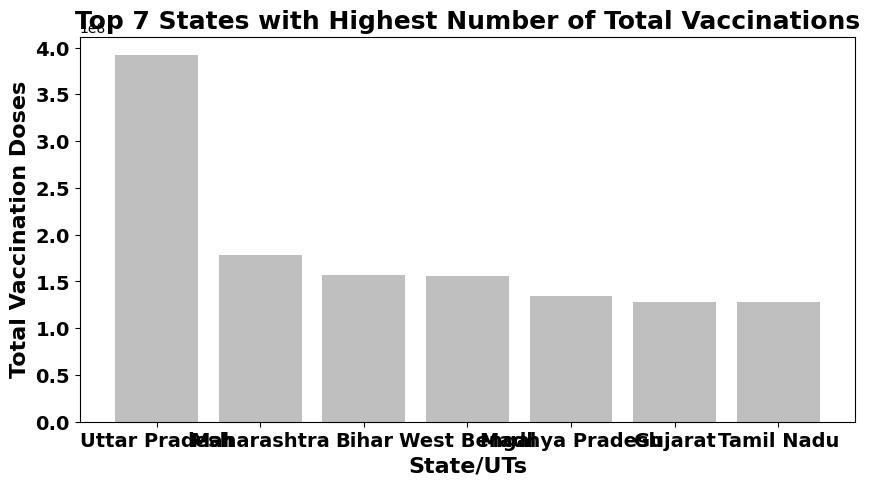

In [17]:
fig = plt.figure(figsize=(10, 5))
plt.bar(x, y, color='0.75')
plt.title('Top 7 States with Highest Number of Total Vaccinations',font='cambria',fontsize=18, fontweight ='bold')
plt.xlabel('State/UTs', font='cambria', fontweight ='bold', fontsize = 16)
plt.ylabel('Total Vaccination Doses', font='cambria', fontweight ='bold', fontsize = 16)
plt.xticks(fontsize=14, font='cambria', fontweight='bold')
plt.yticks(fontsize=14, font='cambria', fontweight='bold')

plt.show()

## States/UTs with lowest number of total vaccinations

In [ ]:
vc2.head(7)

,Total Vaccination Doses,Dose1,Dose 2,Percentage Vaccinated,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,State/UTs
18,145313,56914,56019,84.875987,11415,0,11363,52,0.00,99.54,0.46,Lakshadweep
17,567133,219604,187095,64.406249,29602,0,29371,231,0.00,99.22,0.78,Ladakh
0,991264,313284,320383,80.296290,10766,0,10637,129,0.00,98.80,1.20,Andaman And Nicobar
29,1360477,539929,509134,77.373754,44927,4,44422,501,0.01,98.88,1.12,Sikkim
7,1580060,730855,595090,76.885311,11592,0,11588,4,0.00,99.97,0.03,Dadra And Nagar Haveli And Daman And Diu
24,1739837,837969,684747,33.030514,36033,0,35251,782,0.00,97.83,2.17,Nagaland
23,1793298,785860,669572,51.152703,239560,1,238825,734,0.00,99.69,0.31,Mizoram


In [ ]:
x = vc2['State/UTs'].head(7)
y = vc2['Total Vaccination Doses'].head(7)

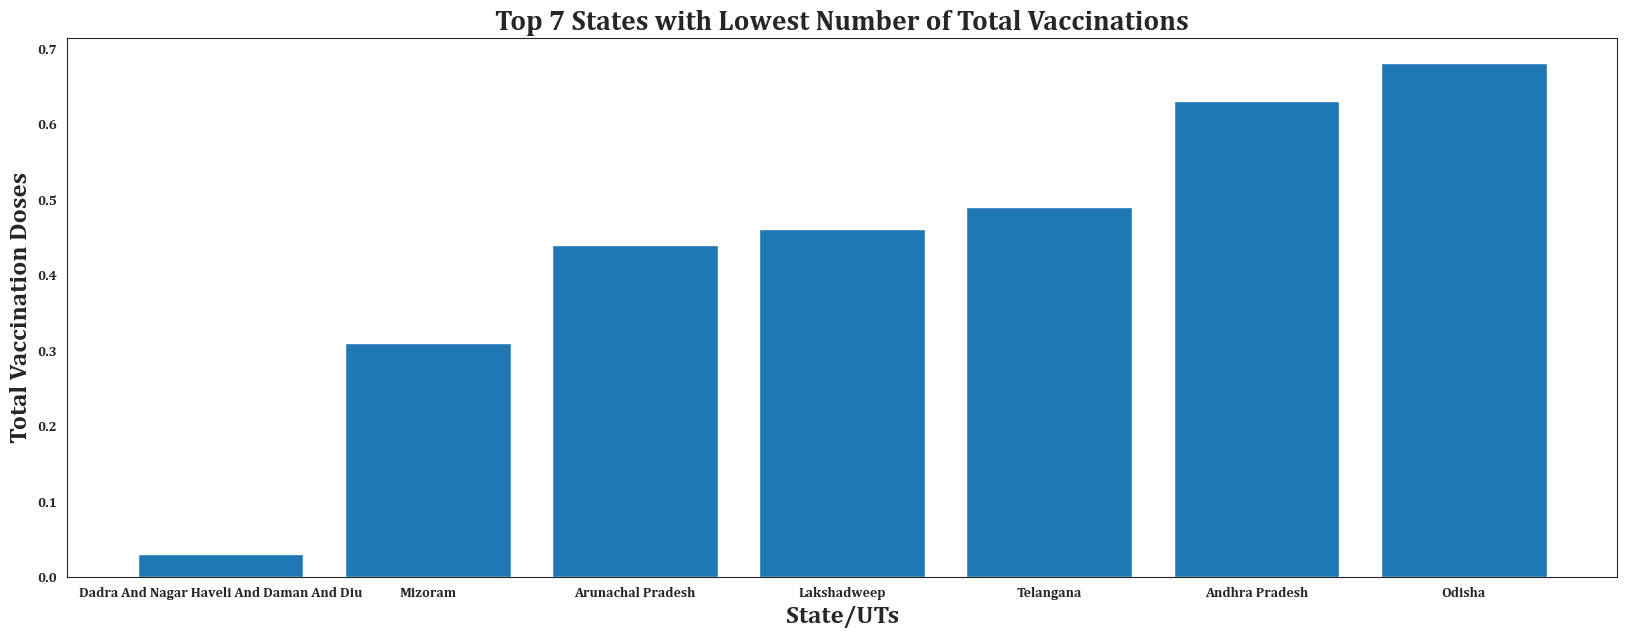

In [ ]:
fig = plt.figure(figsize=(20, 7))
plt.bar(x, y,)
plt.title('Top 7 States with Lowest Number of Total Vaccinations',font='cambria', fontsize=20, fontweight='bold')
plt.xlabel('State/UTs', fontweight ='bold', font='cambria', fontsize = 18)
plt.ylabel('Total Vaccination Doses', font='cambria',fontweight ='bold', fontsize = 18)
plt.xticks(fontsize=18, font='cambria', fontweight='bold')
plt.yticks(fontsize=18, font='cambria', fontweight='bold')
plt.show()

## State/UTs with highest number of Complete Vaccinations

In [ ]:
vc3.head(7)

,Total Vaccination Doses,Dose1,Dose 2,Percentage Vaccinated,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,State/UTs
33,392011174,154096960,147866674,63.872582,2145431,57,2121662,23712,0.00,98.89,1.11,Uttar Pradesh
20,177977996,84665105,71650189,57.364174,8171048,214,8022276,148558,0.00,98.18,1.82,Maharashtra
35,156100370,67305396,61606895,61.059425,2126282,135,2104592,21555,0.01,98.98,1.01,West Bengal
4,157293015,62956601,59160917,46.039494,855267,1,842952,12314,0.00,98.56,1.44,Bihar
19,133940196,54143863,54061656,63.600140,1056351,0,1045565,10786,0.00,98.98,1.02,Madhya Pradesh
30,127533904,56671366,53532301,63.959053,3610655,5,3572569,38081,0.00,98.95,1.05,Tamil Nadu
15,122152396,50032922,50520795,72.587597,4088769,12,4048399,40358,0.00,99.01,0.99,Karnataka


In [ ]:
x = vc3['State/UTs'].head(7)
y = vc3['Dose 2'].head(7)

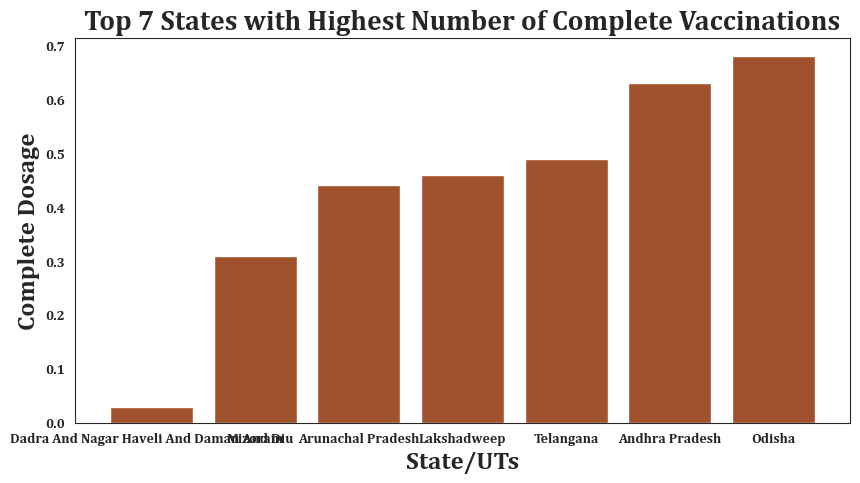

In [ ]:
fig = plt.figure(figsize=(10, 5))
plt.bar(x, y, color='sienna')

plt.title('Top 7 States with Highest Number of Complete Vaccinations', font='cambria',fontsize=20, fontweight='bold')
plt.xlabel('State/UTs', fontweight ='bold', font='cambria',fontsize = 18)
plt.ylabel('Complete Dosage', fontweight ='bold', font='cambria',fontsize = 18)
plt.xticks(fontsize=14, font='cambria',fontweight='bold')
plt.yticks(fontsize=16, font='cambria',fontweight='bold')

plt.show()

## State/UTs with lowest number of Complete Vaaccinations

In [ ]:
vc4.head(7)

,Total Vaccination Doses,Dose1,Dose 2,Percentage Vaccinated,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,State/UTs
18,145313,56914,56019,84.875987,11415,0,11363,52,0.00,99.54,0.46,Lakshadweep
17,567133,219604,187095,64.406249,29602,0,29371,231,0.00,99.22,0.78,Ladakh
0,991264,313284,320383,80.296290,10766,0,10637,129,0.00,98.80,1.20,Andaman And Nicobar
29,1360477,539929,509134,77.373754,44927,4,44422,501,0.01,98.88,1.12,Sikkim
7,1580060,730855,595090,76.885311,11592,0,11588,4,0.00,99.97,0.03,Dadra And Nagar Haveli And Daman And Diu
23,1793298,785860,669572,51.152703,239560,1,238825,734,0.00,99.69,0.31,Mizoram
24,1739837,837969,684747,33.030514,36033,0,35251,782,0.00,97.83,2.17,Nagaland


In [ ]:
x = vc4['State/UTs'].head(7)
y = vc4['Dose 2'].head(7)

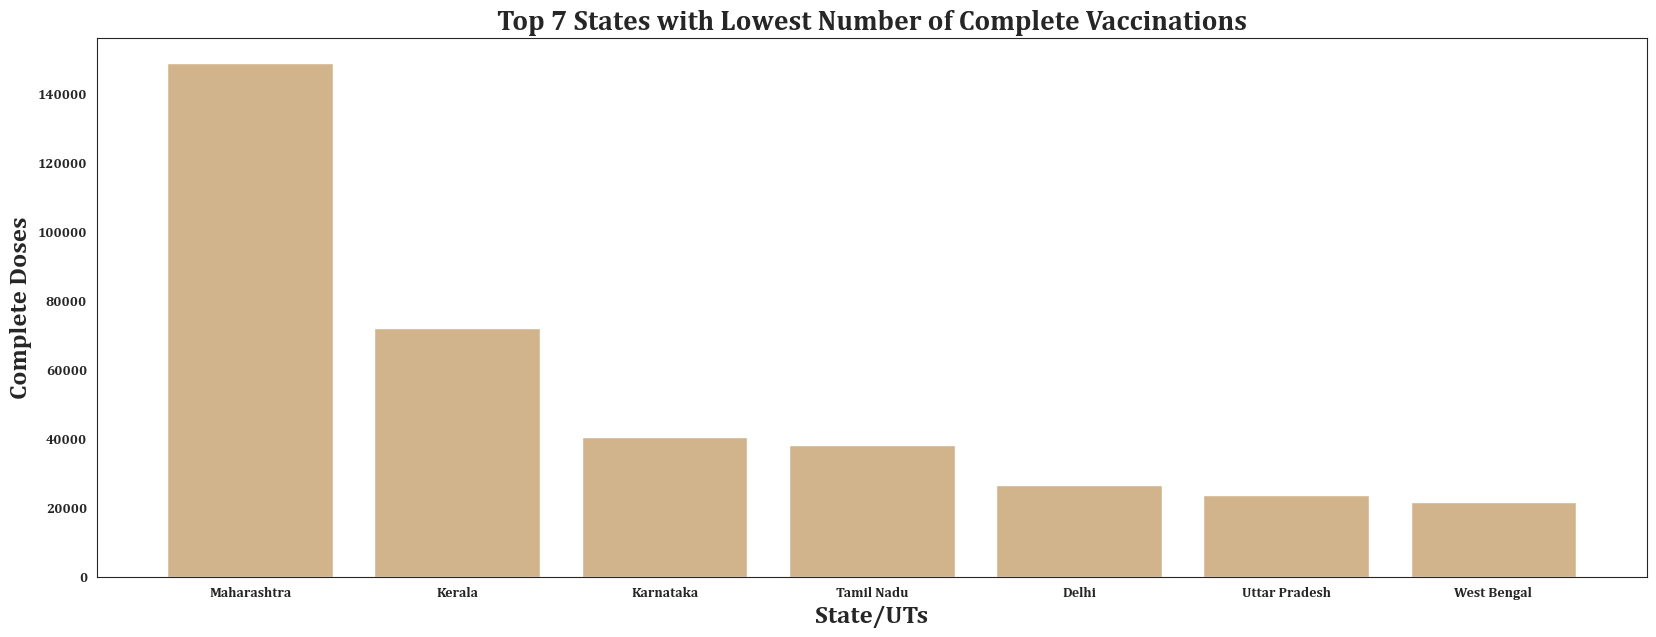

In [ ]:
fig = plt.figure(figsize=(20, 7))
plt.bar(x, y, color='tan')

plt.title('Top 7 States with Lowest Number of Complete Vaccinations', font='cambria',fontsize= 20, fontweight='bold')
plt.xlabel('State/UTs', fontweight ='bold', font='cambria',fontsize = 18)
plt.ylabel('Complete Doses', font='cambria',fontweight ='bold', fontsize = 18)
plt.xticks(fontsize=16, font='cambria',fontweight='bold')
plt.yticks(fontsize=16, font='cambria',fontweight='bold')

plt.show()

## State/UTs with highest percentage of Vaccinations

In [ ]:
vc5.head(7)

,Total Vaccination Doses,Dose1,Dose 2,Percentage Vaccinated,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,State/UTs
18,145313,56914,56019,84.875987,11415,0,11363,52,0.00,99.54,0.46,Lakshadweep
9,2874477,1355046,1224544,80.456665,263346,3,259329,4014,0.00,98.47,1.52,Goa
0,991264,313284,320383,80.296290,10766,0,10637,129,0.00,98.80,1.20,Andaman And Nicobar
5,2291937,1090035,921251,79.552606,100693,0,99508,1185,0.00,98.82,1.18,Chandigarh
29,1360477,539929,509134,77.373754,44927,4,44422,501,0.01,98.88,1.12,Sikkim
12,15325484,6042660,5783693,77.084970,322905,4,318660,4241,0.00,98.69,1.31,Himachal Pradesh
7,1580060,730855,595090,76.885311,11592,0,11588,4,0.00,99.97,0.03,Dadra And Nagar Haveli And Daman And Diu


In [ ]:
x = vc5['State/UTs'].head(7)
y = vc5['Percentage Vaccinated'].head(7)

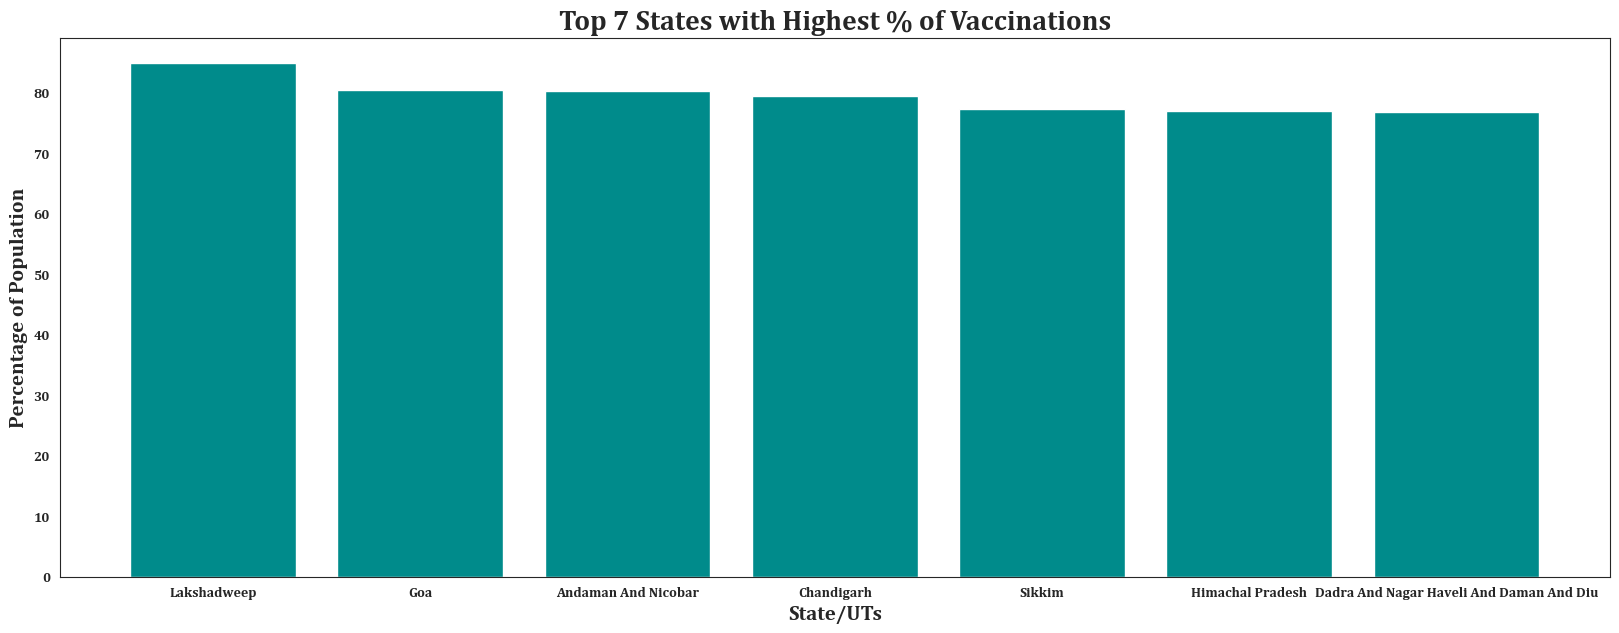

In [ ]:
fig = plt.figure(figsize=(20, 7))
plt.bar(x, y, color='darkcyan')

plt.title('Top 7 States with Highest % of Vaccinations', font='cambria',fontsize=20, fontweight='bold')
plt.xlabel('State/UTs', fontweight ='bold', font='cambria',fontsize = 15)
plt.ylabel('Percentage of Population', font='cambria',fontweight ='bold', fontsize = 15)
plt.xticks(fontsize=16, font='cambria',fontweight='bold')
plt.yticks(fontsize=16, font='cambria',fontweight='bold')

plt.show()

## State/UTs with lowest percentage of Vaccinations

In [ ]:
vc6.head(7)

,Total Vaccination Doses,Dose1,Dose 2,Percentage Vaccinated,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,State/UTs
22,2626010,1332466,1025463,27.185445,96983,3,95352,1628,0.0,98.32,1.68,Meghalaya
24,1739837,837969,684747,33.030514,36033,0,35251,782,0.0,97.83,2.17,Nagaland
21,3269105,1464399,1226336,35.680959,140034,0,137885,2149,0.0,98.47,1.53,Manipur
14,43875944,21310378,16112704,40.180930,443826,1,438491,5334,0.0,98.80,1.20,Jharkhand
2,1924584,861396,748505,43.722440,67049,0,66753,296,0.0,99.56,0.44,Arunachal Pradesh
4,157293015,62956601,59160917,46.039494,855267,1,842952,12314,0.0,98.56,1.44,Bihar
1,110957430,40645695,43555744,47.496802,2340676,0,2325943,14733,0.0,99.37,0.63,Andhra Pradesh


In [ ]:
x = vc6['State/UTs'].head(7)
y = vc6['Percentage Vaccinated'].head(7)

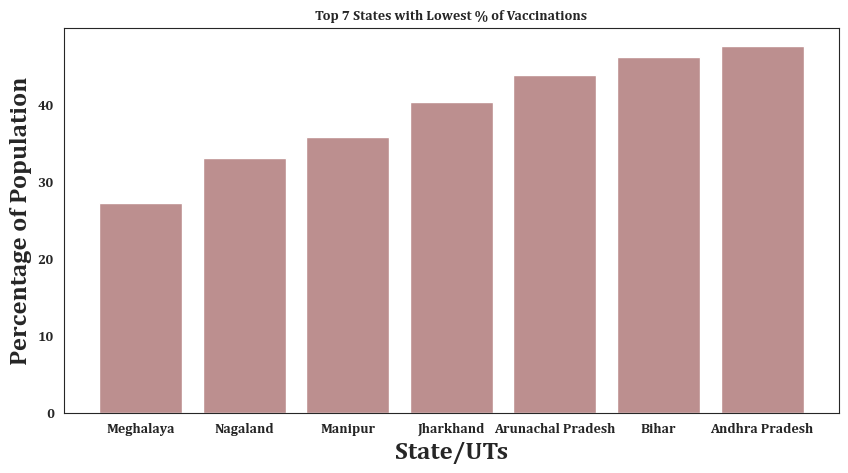

In [ ]:
fig = plt.figure(figsize=(10, 5))
plt.bar(x, y, color='rosybrown')

plt.title('Top 7 States with Lowest % of Vaccinations', fontsize=24, font='cambria',fontweight='bold')
plt.xlabel('State/UTs', fontweight ='bold',font='cambria',  fontsize = 18)
plt.ylabel('Percentage of Population',font='cambria', fontweight ='bold', fontsize = 18)
plt.xticks(fontsize=16, font='cambria',fontweight='bold')
plt.yticks(fontsize=16, font='cambria',fontweight='bold')

plt.show()

### Creating multiple dataframe each sorted on ascending order and decending order based on Deaths, Total Cases and Death Ratio(%).

In [ ]:
df1= combined_df.sort_values(by="Deaths",ascending=False)
df2= combined_df.sort_values(by="Deaths")
df3= combined_df.sort_values(by="Total Cases",ascending=False)
df4= combined_df.sort_values(by="Total Cases")
df5= combined_df.sort_values(by="Death Ratio",ascending=False)
df6= combined_df.sort_values(by="Death Ratio")

## Statewise highest death

In [ ]:
df1.head(7)

,Total Vaccination Doses,Dose1,Dose 2,Percentage Vaccinated,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,State/UTs
20,177977996,84665105,71650189,57.364174,8171048,214,8022276,148558,0.00,98.18,1.82,Maharashtra
16,57511593,27017714,23803189,68.599309,6907241,18,6835181,72042,0.00,98.96,1.04,Kerala
15,122152396,50032922,50520795,72.587597,4088769,12,4048399,40358,0.00,99.01,0.99,Karnataka
30,127533904,56671366,53532301,63.959053,3610655,5,3572569,38081,0.00,98.95,1.05,Tamil Nadu
8,37409355,16605099,14356077,74.379595,2040910,14,2014230,26666,0.00,98.69,1.31,Delhi
33,392011174,154096960,147866674,63.872582,2145431,57,2121662,23712,0.00,98.89,1.11,Uttar Pradesh
35,156100370,67305396,61606895,61.059425,2126282,135,2104592,21555,0.01,98.98,1.01,West Bengal


In [ ]:
x = df1['State/UTs'].head(7)
y = df1['Deaths'].head(7)

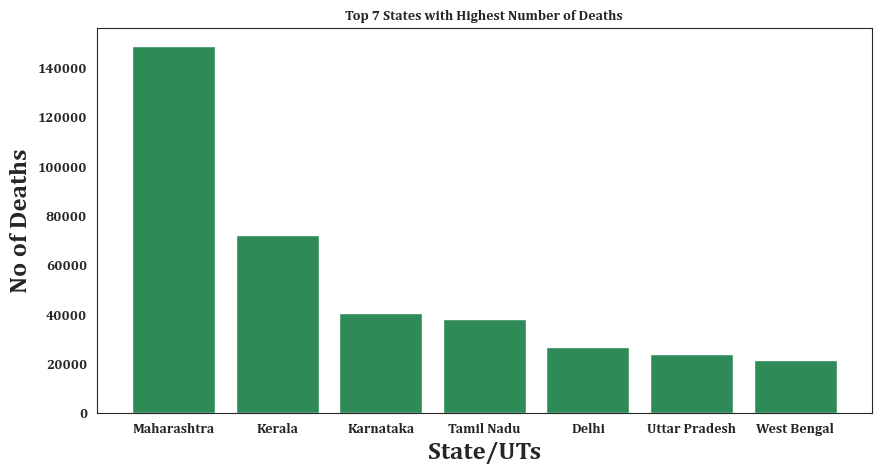

In [ ]:
fig = plt.figure(figsize=(10, 5))
plt.bar(x, y, color='seagreen')

plt.title('Top 7 States with Highest Number of Deaths', fontsize=20, font='cambria', fontweight ='bold')
plt.xlabel('State/UTs', fontweight ='bold', fontsize = 18, font='cambria')
plt.ylabel('No of Deaths', fontweight ='bold', fontsize = 18, font='cambria')
plt.xticks(fontsize=16, font='cambria',fontweight='bold')
plt.yticks(fontsize=16, font='cambria',fontweight='bold')

plt.show()


## Statewise Lowest death

In [ ]:
df2.head(7)

,Total Vaccination Doses,Dose1,Dose 2,Percentage Vaccinated,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,State/UTs
7,1580060,730855,595090,76.885311,11592,0,11588,4,0.00,99.97,0.03,Dadra And Nagar Haveli And Daman And Diu
18,145313,56914,56019,84.875987,11415,0,11363,52,0.00,99.54,0.46,Lakshadweep
0,991264,313284,320383,80.296290,10766,0,10637,129,0.00,98.80,1.20,Andaman And Nicobar
17,567133,219604,187095,64.406249,29602,0,29371,231,0.00,99.22,0.78,Ladakh
2,1924584,861396,748505,43.722440,67049,0,66753,296,0.00,99.56,0.44,Arunachal Pradesh
29,1360477,539929,509134,77.373754,44927,4,44422,501,0.01,98.88,1.12,Sikkim
23,1793298,785860,669572,51.152703,239560,1,238825,734,0.00,99.69,0.31,Mizoram


In [ ]:
x = df2['State/UTs'].head(7)
y = df2['Deaths'].head(7)


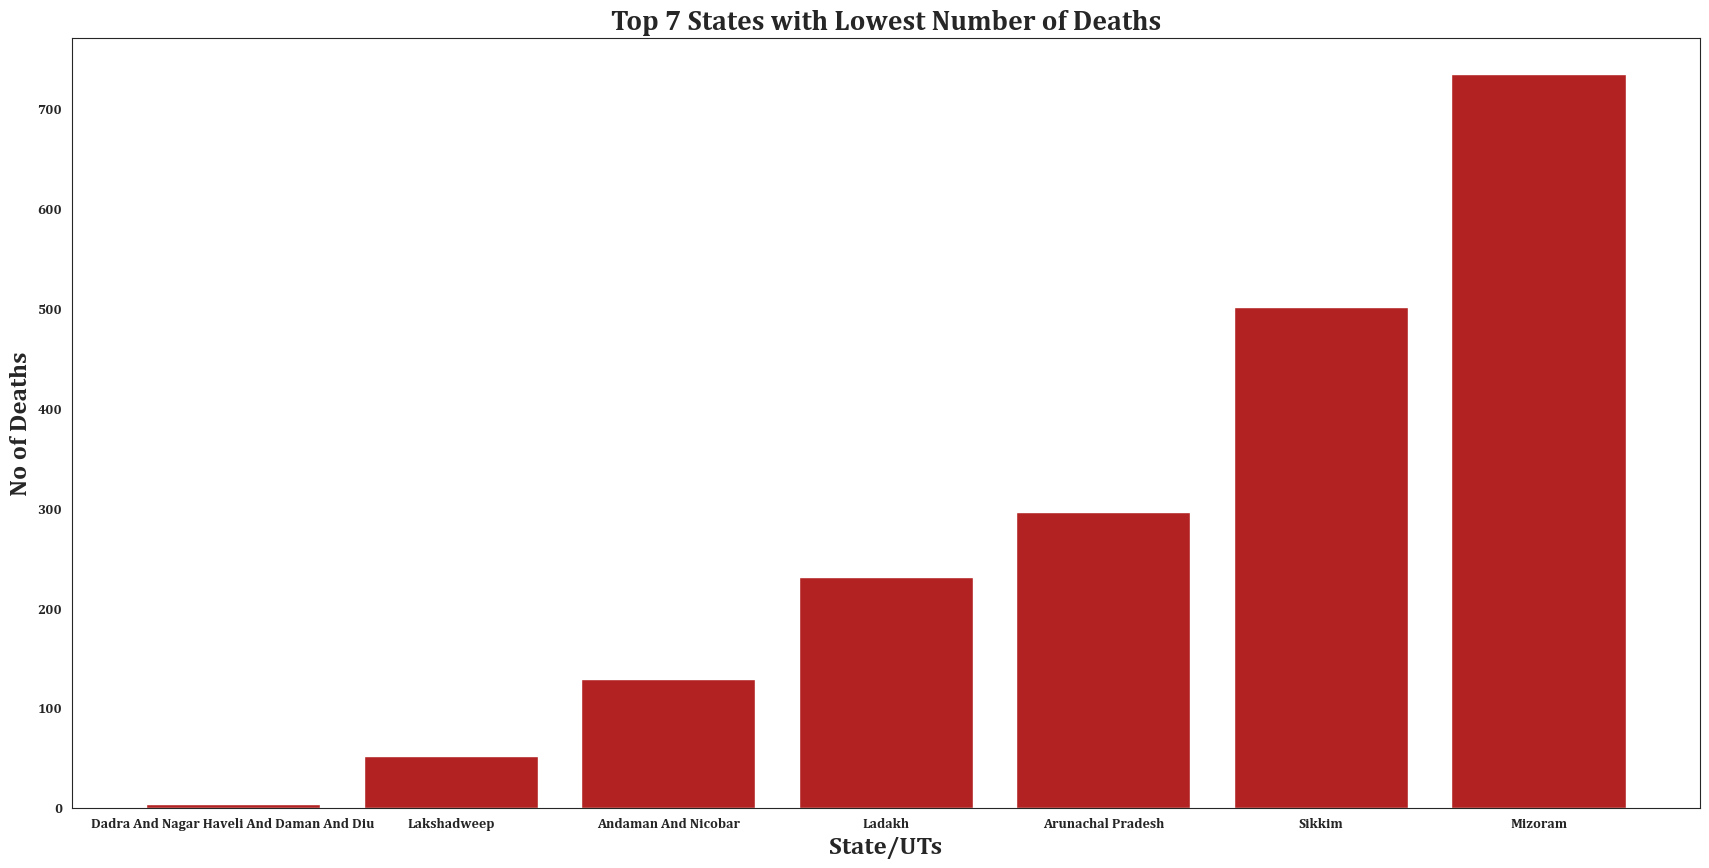

In [ ]:
fig = plt.figure(figsize=(21, 10))
plt.bar(x, y, color='firebrick')

plt.title('Top 7 States with Lowest Number of Deaths',font='cambria', fontsize=20, fontweight='bold')
plt.xlabel('State/UTs', fontweight ='bold',font='cambria', fontsize = 18)
plt.ylabel('No of Deaths', font='cambria',fontweight ='bold', fontsize = 18)
plt.xticks(fontsize=16, font='cambria',fontweight='bold')
plt.yticks(fontsize=16, font='cambria',fontweight='bold')

plt.show()

## Statewise Most Deaths and Vaccination Comparision

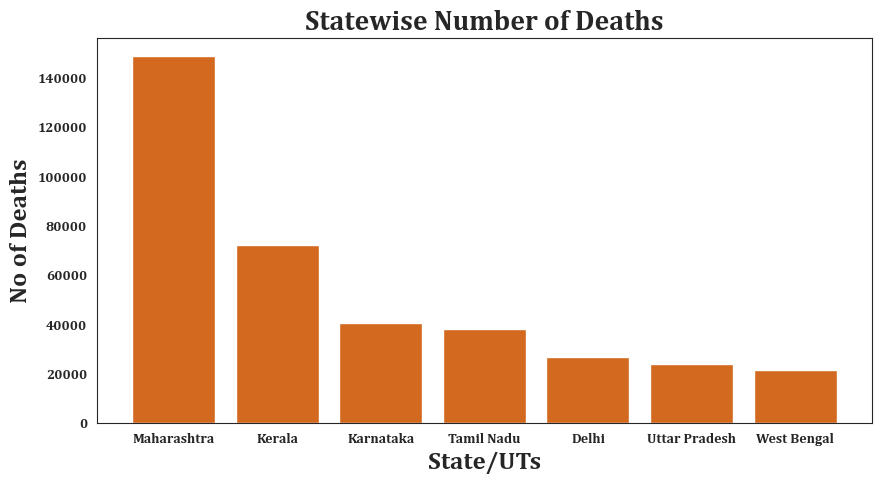

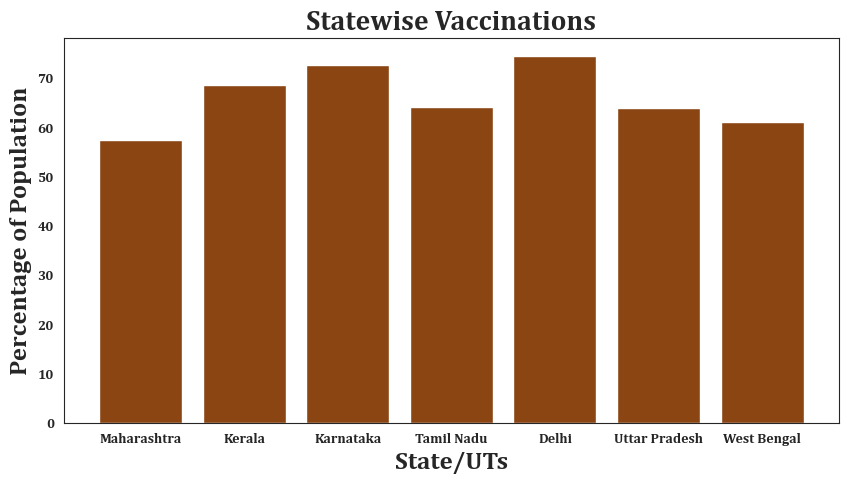

In [ ]:
#Define variable for most deaths chart
x = df1['State/UTs'].head(7)
y = df1['Deaths'].head(7)

#Making chart for number of deaths
fig = plt.figure(figsize=(10, 5))
plt.bar(x, y, color='chocolate')
plt.title('Statewise Number of Deaths',font='cambria', fontsize=20, fontweight='bold')
plt.xlabel('State/UTs', fontweight ='bold',font='cambria', fontsize = 18)
plt.ylabel('No of Deaths', fontweight ='bold', font='cambria',fontsize = 18)
plt.xticks(fontsize=16, font='cambria',fontweight='bold')
plt.yticks(fontsize=16, font='cambria',fontweight='bold')

plt.show()

#Define variable for vaccinated (%)
x = df1['State/UTs'].head(7)
b = df1['Percentage Vaccinated'].head(7)

#Making chart of number of vacinated (%)
fig = plt.figure(figsize=(10, 5))
plt.bar(x, b, color='saddlebrown')
plt.title('Statewise Vaccinations',font='cambria', fontsize=20, fontweight='bold')
plt.xlabel('State/UTs', fontweight ='bold', font='cambria',fontsize = 18)
plt.ylabel('Percentage of Population', fontweight ='bold', font='cambria',fontsize = 18)
plt.xticks(fontsize=16, font='cambria',fontweight='bold')
plt.yticks(fontsize=16, font='cambria',fontweight='bold')

plt.show()

## Statewise Least Deaths and Vaccination Comparision

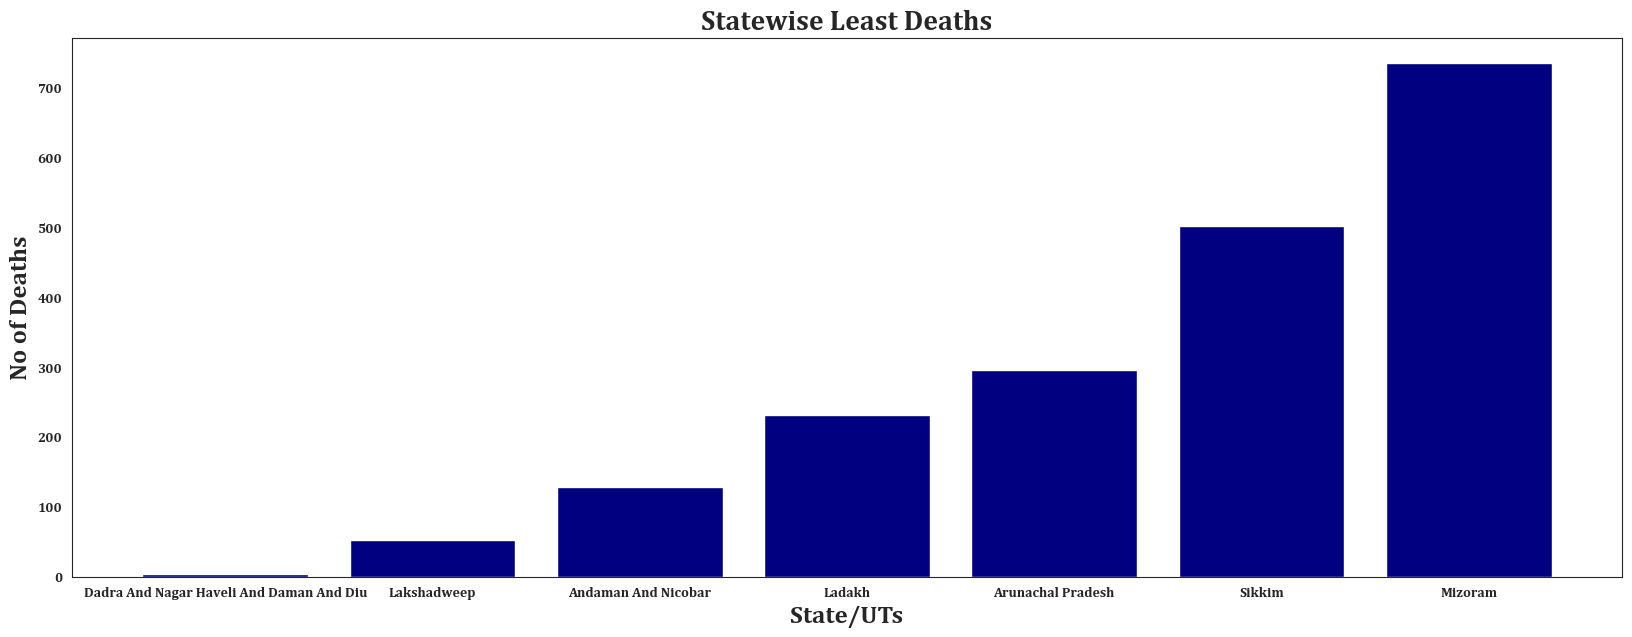

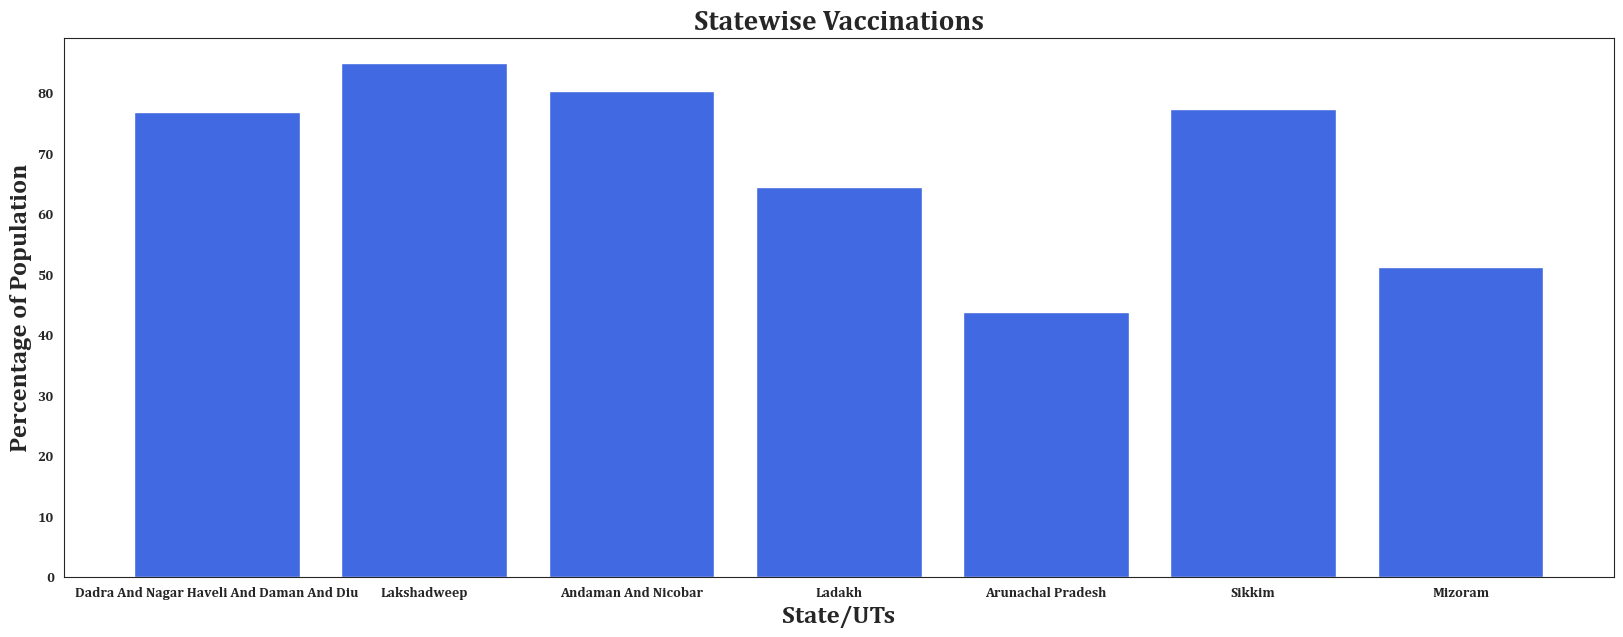

In [ ]:
### Figure ONE ###

#Define variable for least deaths chart
x = df2['State/UTs'].head(7)
y = df2['Deaths'].head(7)

#Making chart for number of deaths
fig = plt.figure(figsize=(20, 7))
plt.bar(x, y, color='navy')
plt.title('Statewise Least Deaths',font='cambria', fontsize=20, fontweight='bold')
plt.xlabel('State/UTs', font='cambria',fontweight ='bold', fontsize = 18)
plt.ylabel('No of Deaths', font='cambria',fontweight ='bold', fontsize = 18)
plt.xticks(fontsize=16, font='cambria',fontweight='bold')
plt.yticks(fontsize=16, font='cambria',fontweight='bold')
plt.show()

### Figure TWO ###

#Define variable for vaccinated (%)
x = df2['State/UTs'].head(7)
b = df2['Percentage Vaccinated'].head(7)

#Making chart of number of vacinated (%)
fig = plt.figure(figsize=(20, 7))
plt.bar(x, b, color='royalblue')
plt.title('Statewise Vaccinations',font='cambria', fontsize=20, fontweight='bold')
plt.xlabel('State/UTs', font='cambria',fontweight ='bold', fontsize = 18)
plt.ylabel('Percentage of Population',font='cambria', fontweight ='bold', fontsize = 18)
plt.xticks(fontsize=16, font='cambria',fontweight='bold')
plt.yticks(fontsize=16, font='cambria',fontweight='bold')
plt.show()

## State with Highest COVID Patient till Date and Vaccination Status (Percentage Vaccinated and Total Doses)

In [ ]:
df3.head()

,Total Vaccination Doses,Dose1,Dose 2,Percentage Vaccinated,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,State/UTs
20,177977996,84665105,71650189,57.364174,8171048,214,8022276,148558,0.0,98.18,1.82,Maharashtra
16,57511593,27017714,23803189,68.599309,6907241,18,6835181,72042,0.0,98.96,1.04,Kerala
15,122152396,50032922,50520795,72.587597,4088769,12,4048399,40358,0.0,99.01,0.99,Karnataka
30,127533904,56671366,53532301,63.959053,3610655,5,3572569,38081,0.0,98.95,1.05,Tamil Nadu
1,110957430,40645695,43555744,47.496802,2340676,0,2325943,14733,0.0,99.37,0.63,Andhra Pradesh


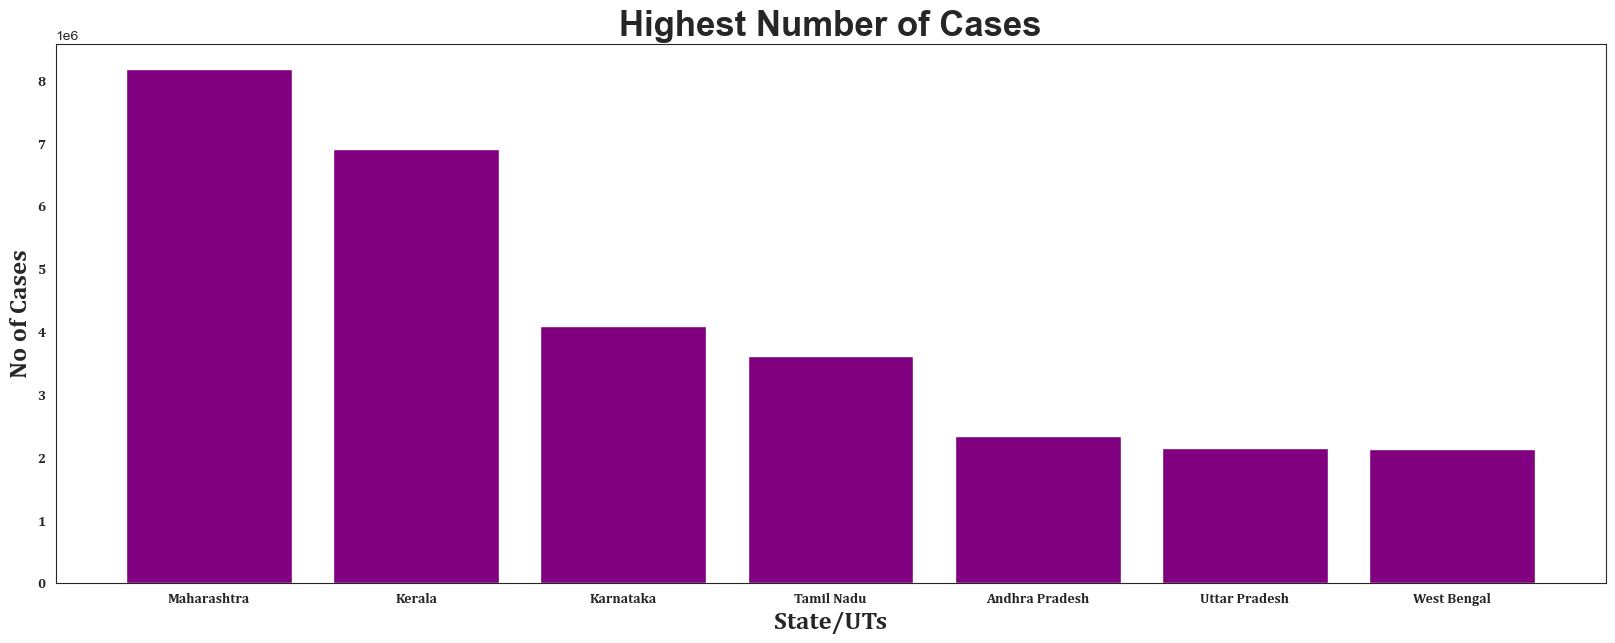

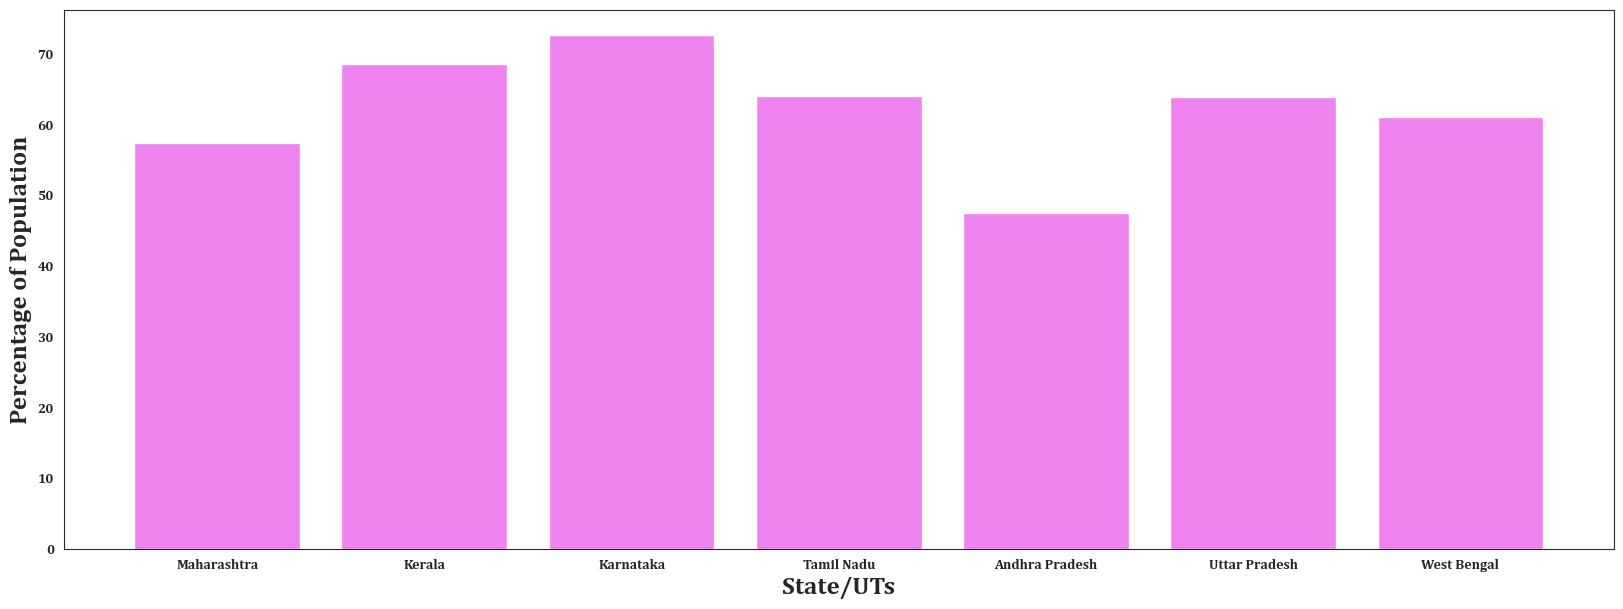

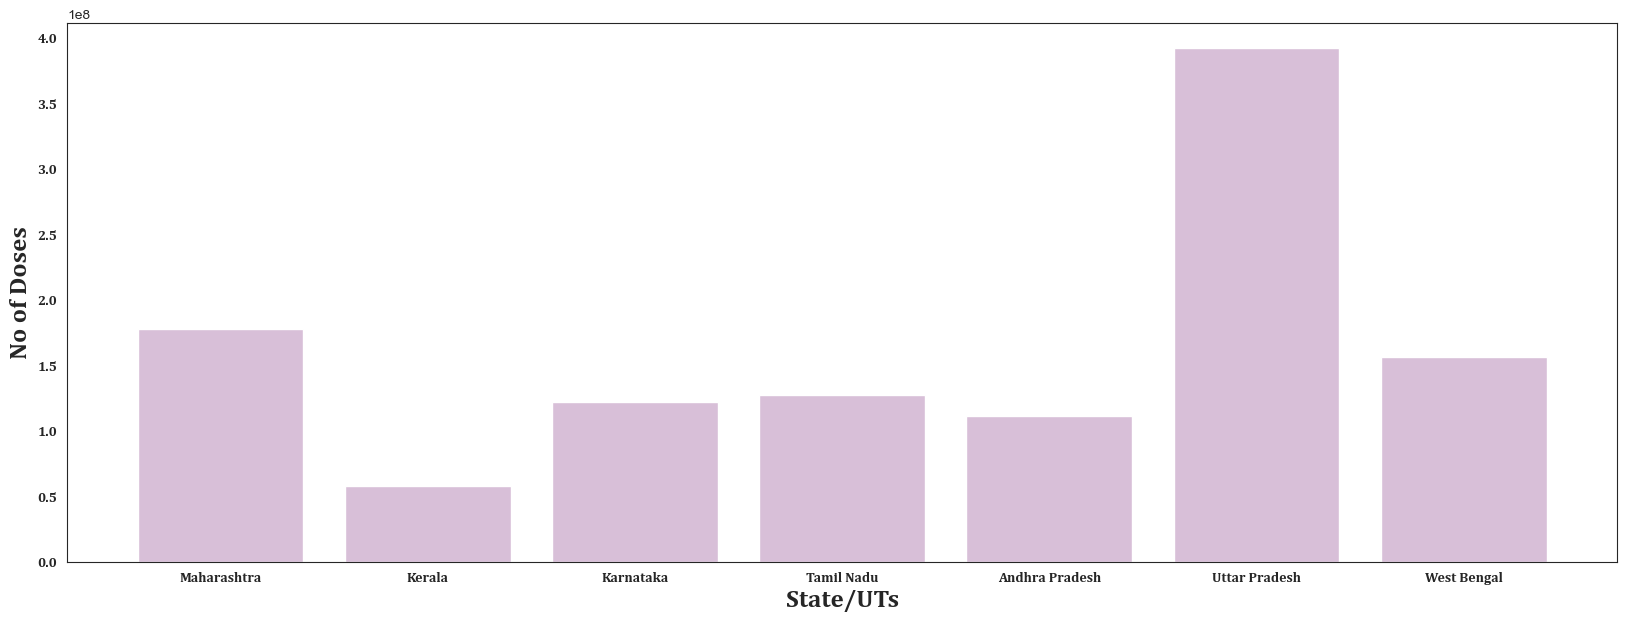

In [ ]:
### Figure ONE ###

#Define variable for least deaths chart
x = df3['State/UTs'].head(7)
y = df3['Total Cases'].head(7)

#Making chart for number of deaths
fig = plt.figure(figsize=(20, 7))
plt.bar(x, y, color='purple')

plt.title('Highest Number of Cases', fontweight ='bold', fontsize = 25)

plt.xlabel('State/UTs', fontweight ='bold', fontsize = 18, font='cambria')
plt.ylabel('No of Cases', fontweight ='bold', fontsize = 18, font='cambria')
plt.xticks(fontsize=16, font='cambria',fontweight='bold')
plt.yticks(fontsize=16, font='cambria',fontweight='bold')
plt.show()

### Figure TWO ###

#Define variable for vaccinated (%)
x = df3['State/UTs'].head(7)
b = df3['Percentage Vaccinated'].head(7)

#Making chart of number of vacinated (%)
fig = plt.figure(figsize=(20, 7))
plt.bar(x, b, color='violet')

plt.xlabel('State/UTs', fontweight ='bold', fontsize = 18,  font='cambria')
plt.ylabel('Percentage of Population', fontweight ='bold', fontsize = 18,  font='cambria',)
plt.xticks(fontsize=16, font='cambria',fontweight='bold')
plt.yticks(fontsize=16, font='cambria',fontweight='bold')

plt.show()

## Figure Three ##

#Define variable for total doses
x = df3['State/UTs'].head(7)
c = df3['Total Vaccination Doses'].head(7)

#Making chart of number of doses
fig = plt.figure(figsize=(20, 7))
plt.bar(x, c, color='thistle')

plt.xlabel('State/UTs', fontweight ='bold', font='cambria',fontsize = 18)
plt.ylabel('No of Doses', font='cambria',fontweight ='bold', fontsize = 18)
plt.xticks(fontsize=16, font='cambria',fontweight='bold')
plt.yticks(fontsize=16, font='cambria',fontweight='bold')

plt.show()

## State with Lowest COVID Patient till Date and Vaccination Status (Percentage Vaccinated and Total Doses)

In [ ]:
df4.head()

,Total Vaccination Doses,Dose1,Dose 2,Percentage Vaccinated,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,State/UTs
0,991264,313284,320383,80.296290,10766,0,10637,129,0.0,98.80,1.20,Andaman And Nicobar
18,145313,56914,56019,84.875987,11415,0,11363,52,0.0,99.54,0.46,Lakshadweep
7,1580060,730855,595090,76.885311,11592,0,11588,4,0.0,99.97,0.03,Dadra And Nagar Haveli And Daman And Diu
17,567133,219604,187095,64.406249,29602,0,29371,231,0.0,99.22,0.78,Ladakh
24,1739837,837969,684747,33.030514,36033,0,35251,782,0.0,97.83,2.17,Nagaland


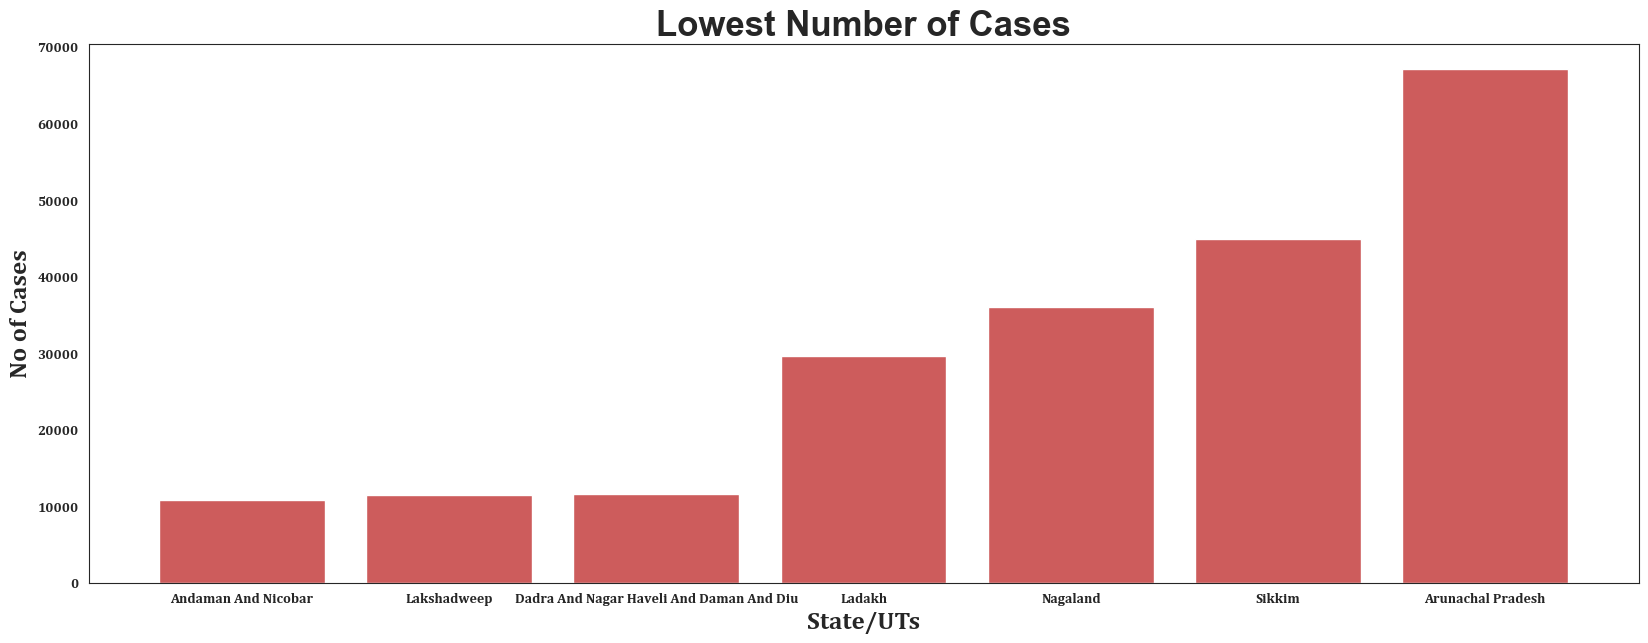

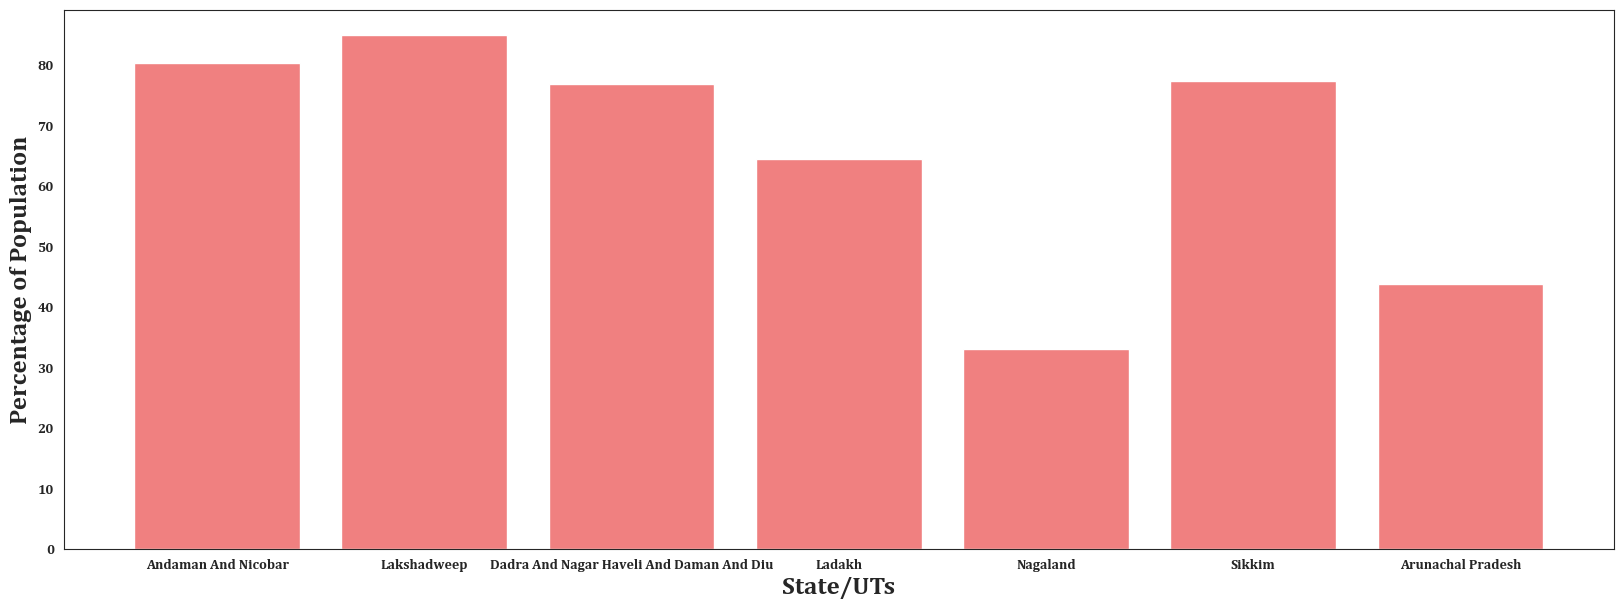

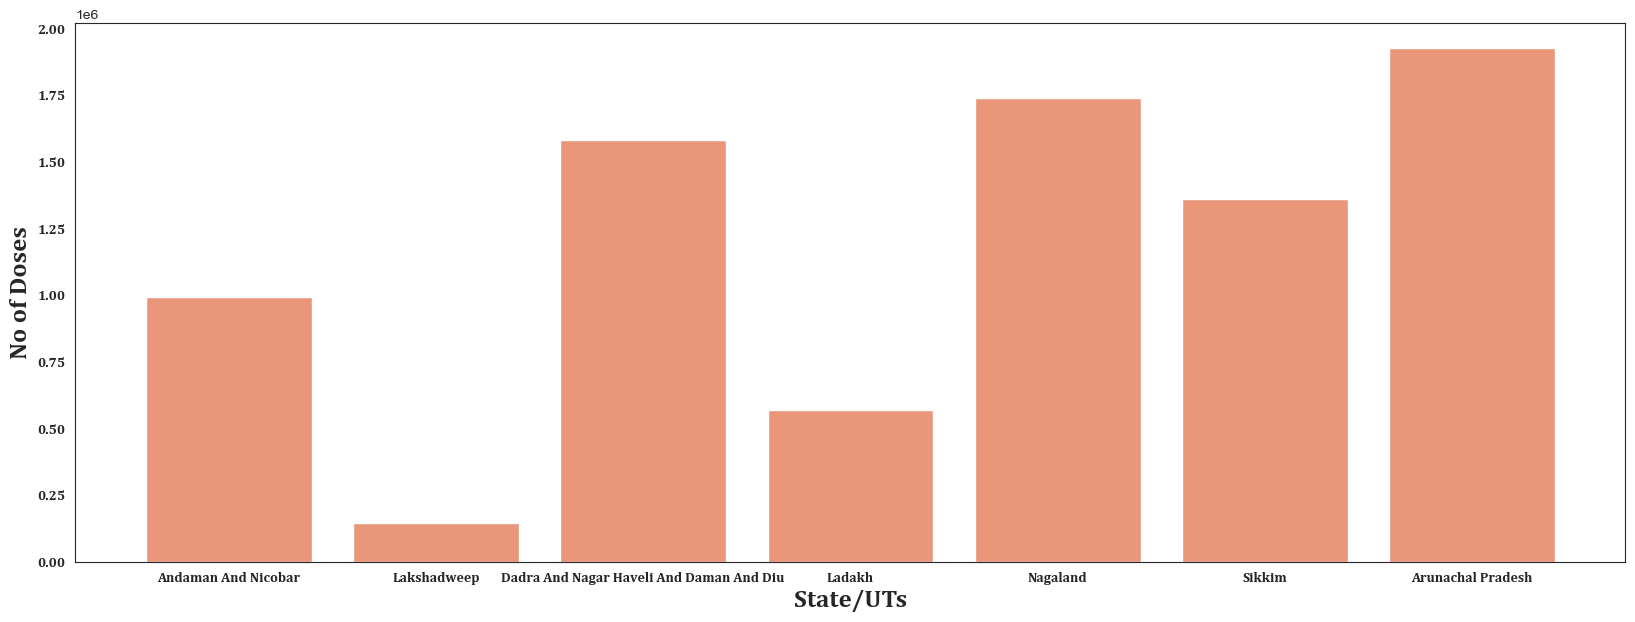

In [ ]:
### Figure ONE ###

#Define variable for least cases chart
x = df4['State/UTs'].head(7)
y = df4['Total Cases'].head(7)

#Making chart for number of cases
fig = plt.figure(figsize=(20, 7))
plt.bar(x, y, color='indianred')

plt.title('Lowest Number of Cases', fontweight ='bold', fontsize = 25)
plt.xlabel('State/UTs', fontweight ='bold', font='cambria', fontsize = 18)
plt.ylabel('No of Cases', fontweight ='bold',  font='cambria',fontsize = 18)
plt.xticks(fontsize=16, font='cambria',fontweight='bold')
plt.yticks(fontsize=16, font='cambria',fontweight='bold')

plt.show()

### Figure TWO ###

#Define variable for vaccinated (%)
x = df4['State/UTs'].head(7)
b = df4['Percentage Vaccinated'].head(7)

#Making chart of number of vacinated (%)
fig = plt.figure(figsize=(20, 7))
plt.bar(x, b, color='lightcoral')

plt.xlabel('State/UTs',  font='cambria',fontweight ='bold', fontsize = 18)
plt.ylabel('Percentage of Population',  font='cambria', fontweight ='bold', fontsize = 18)
plt.xticks(fontsize=16, font='cambria',fontweight='bold')
plt.yticks(fontsize=16, font='cambria',fontweight='bold')

plt.show()

## Figure Three ##

#Define variable for total doses
x = df4['State/UTs'].head(7)
c = df4['Total Vaccination Doses'].head(7)

#Making chart of number doses
fig = plt.figure(figsize=(20, 7))
plt.bar(x, c, color='darksalmon')

plt.xlabel('State/UTs', fontweight ='bold', font='cambria', fontsize = 18)
plt.ylabel('No of Doses', fontweight ='bold',  font='cambria', fontsize = 18, )
plt.xticks(fontsize=16, font='cambria',fontweight='bold')
plt.yticks(fontsize=16, font='cambria',fontweight='bold')

plt.show()

## State with Highest Death Ratio till Date with Total Cases and Percentage Vaccinated

In [ ]:
df5.head()


,Total Vaccination Doses,Dose1,Dose 2,Percentage Vaccinated,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,State/UTs
27,47051166,22361633,19621018,64.329043,793644,1233,773073,19338,0.16,97.41,2.44,Punjab
24,1739837,837969,684747,33.030514,36033,0,35251,782,0.00,97.83,2.17,Nagaland
20,177977996,84665105,71650189,57.364174,8171048,214,8022276,148558,0.00,98.18,1.82,Maharashtra
34,20143654,8183361,7949246,67.941699,452571,0,444803,7768,0.00,98.28,1.72,Uttarakhand
22,2626010,1332466,1025463,27.185445,96983,3,95352,1628,0.00,98.32,1.68,Meghalaya


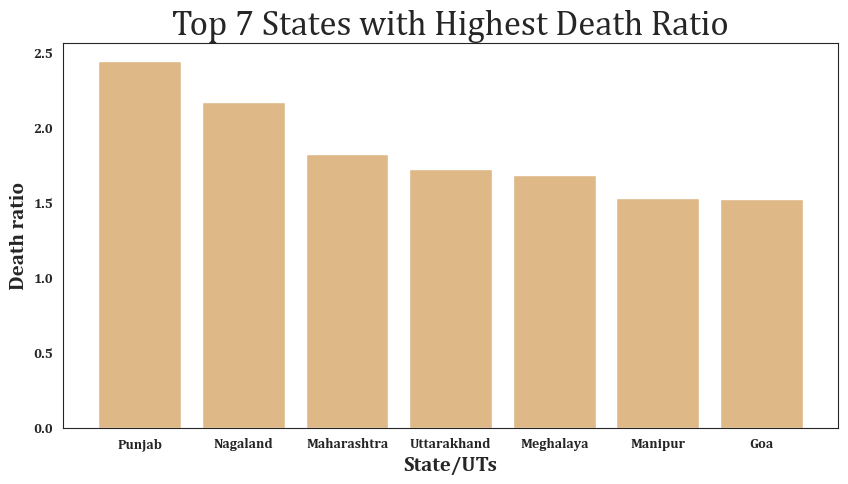

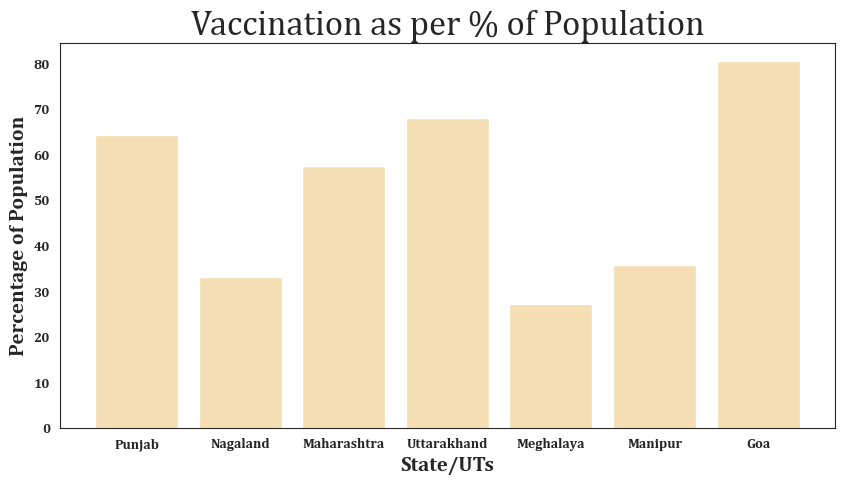

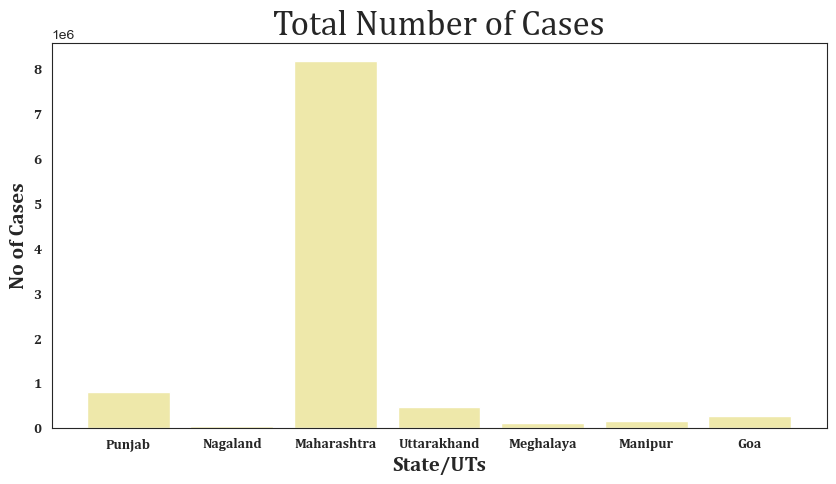

In [ ]:
### Figure ONE ###

#Define variable for highest death ratio
x = df5['State/UTs'].head(7)
y = df5['Death Ratio'].head(7)

#Making chart for number of cases
fig = plt.figure(figsize=(10, 5))
plt.bar(x, y, color='burlywood')

plt.title('Top 7 States with Highest Death Ratio', fontweight ='bold',font='cambria', fontsize = 25)
plt.xlabel('State/UTs', font='cambria', fontweight ='bold', fontsize = 15)
plt.ylabel('Death ratio', font='cambria', fontweight ='bold', fontsize = 15)
plt.xticks(fontsize=16, font='cambria',fontweight='bold')
plt.yticks(fontsize=16, font='cambria',fontweight='bold')

plt.show()

### Figure TWO ###

#Define variable for vaccinated (%)
x = df5['State/UTs'].head(7)
b = df5['Percentage Vaccinated'].head(7)

#Making chart of number of vacinated (%)
fig = plt.figure(figsize=(10, 5))
plt.bar(x, b,  color='wheat')

plt.title('Vaccination as per % of Population', fontweight ='bold',font='cambria', fontsize = 25)
plt.xlabel('State/UTs', font='cambria',fontweight ='bold', fontsize = 15)
plt.ylabel('Percentage of Population', font='cambria', fontweight ='bold', fontsize = 15)
plt.xticks(fontsize=16, font='cambria',fontweight='bold')
plt.yticks(fontsize=16, font='cambria',fontweight='bold')

plt.show()

## Figure Three ##

#Define variable for total doses
x = df5['State/UTs'].head(7)
c = df5['Total Cases'].head(7)

#Making chart of number doses
fig = plt.figure(figsize=(10, 5))
plt.bar(x, c,  color='palegoldenrod')

plt.title('Total Number of Cases', fontweight ='bold', font='cambria',fontsize = 25)
plt.xlabel('State/UTs', font='cambria',fontweight ='bold', fontsize = 15)
plt.ylabel('No of Cases', font='cambria',fontweight ='bold', fontsize = 15)
plt.xticks(fontsize=16, font='cambria',fontweight='bold')
plt.yticks(fontsize=16, font='cambria',fontweight='bold')

plt.show()

## State with Lowest Death Ratio till Date with Total Cases and Percentage Vaccinated

In [ ]:
df6.head()

,Total Vaccination Doses,Dose1,Dose 2,Percentage Vaccinated,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,State/UTs
7,1580060,730855,595090,76.885311,11592,0,11588,4,0.0,99.97,0.03,Dadra And Nagar Haveli And Daman And Diu
23,1793298,785860,669572,51.152703,239560,1,238825,734,0.0,99.69,0.31,Mizoram
2,1924584,861396,748505,43.722440,67049,0,66753,296,0.0,99.56,0.44,Arunachal Pradesh
18,145313,56914,56019,84.875987,11415,0,11363,52,0.0,99.54,0.46,Lakshadweep
31,77627542,29616909,29076857,76.202584,844432,8,840313,4111,0.0,99.51,0.49,Telangana


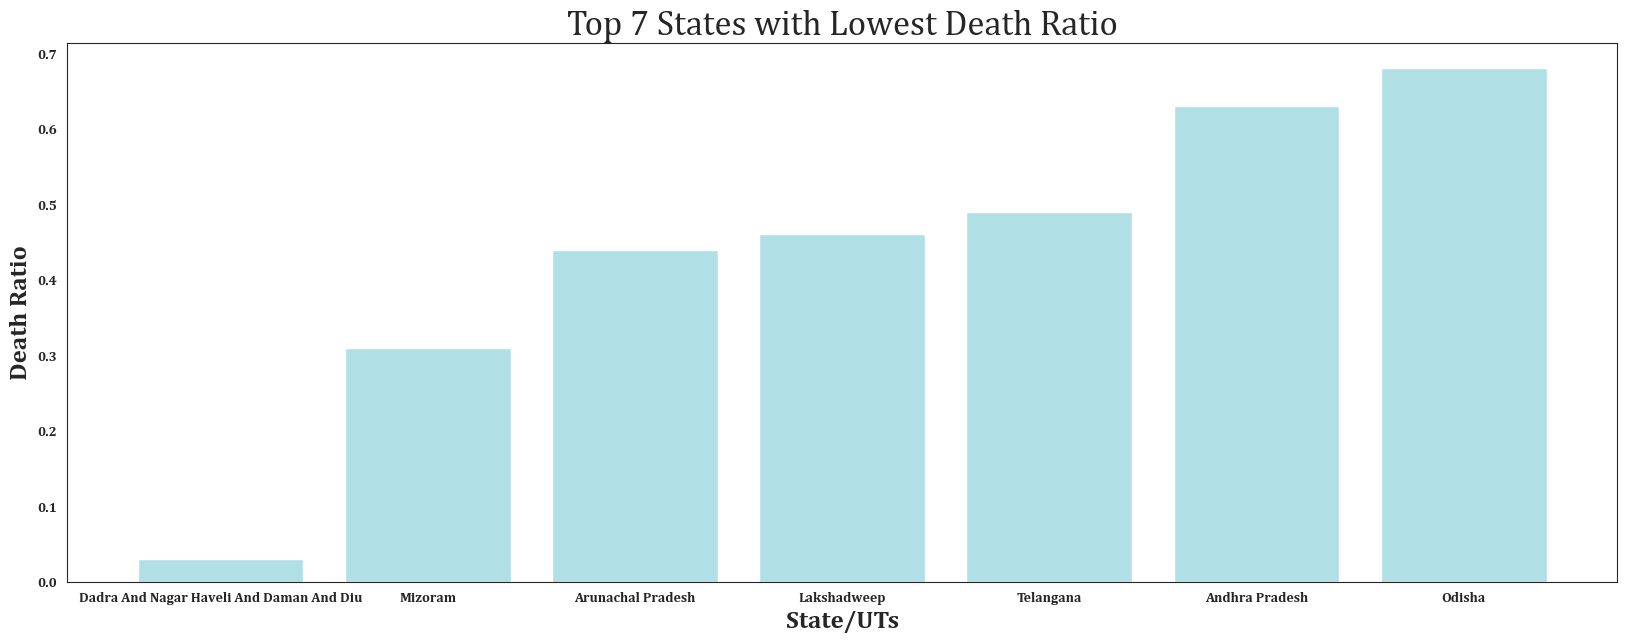

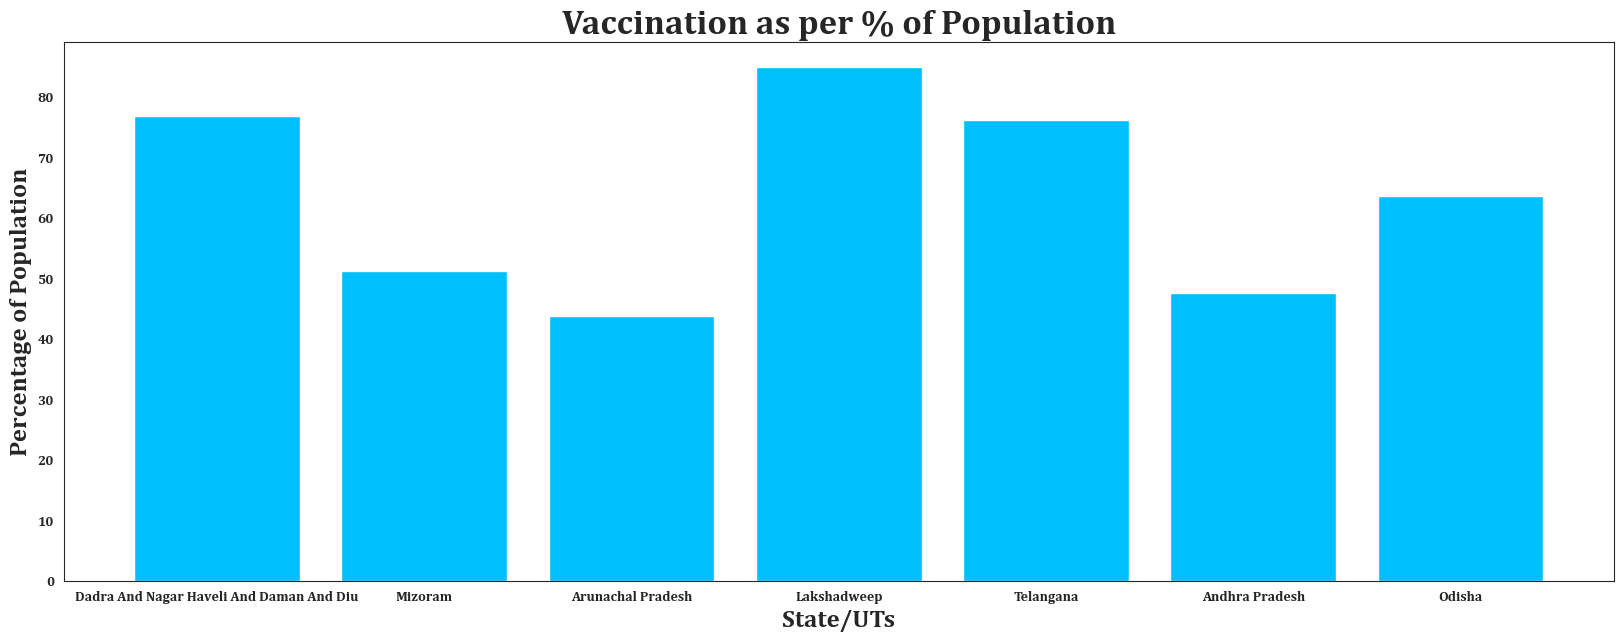

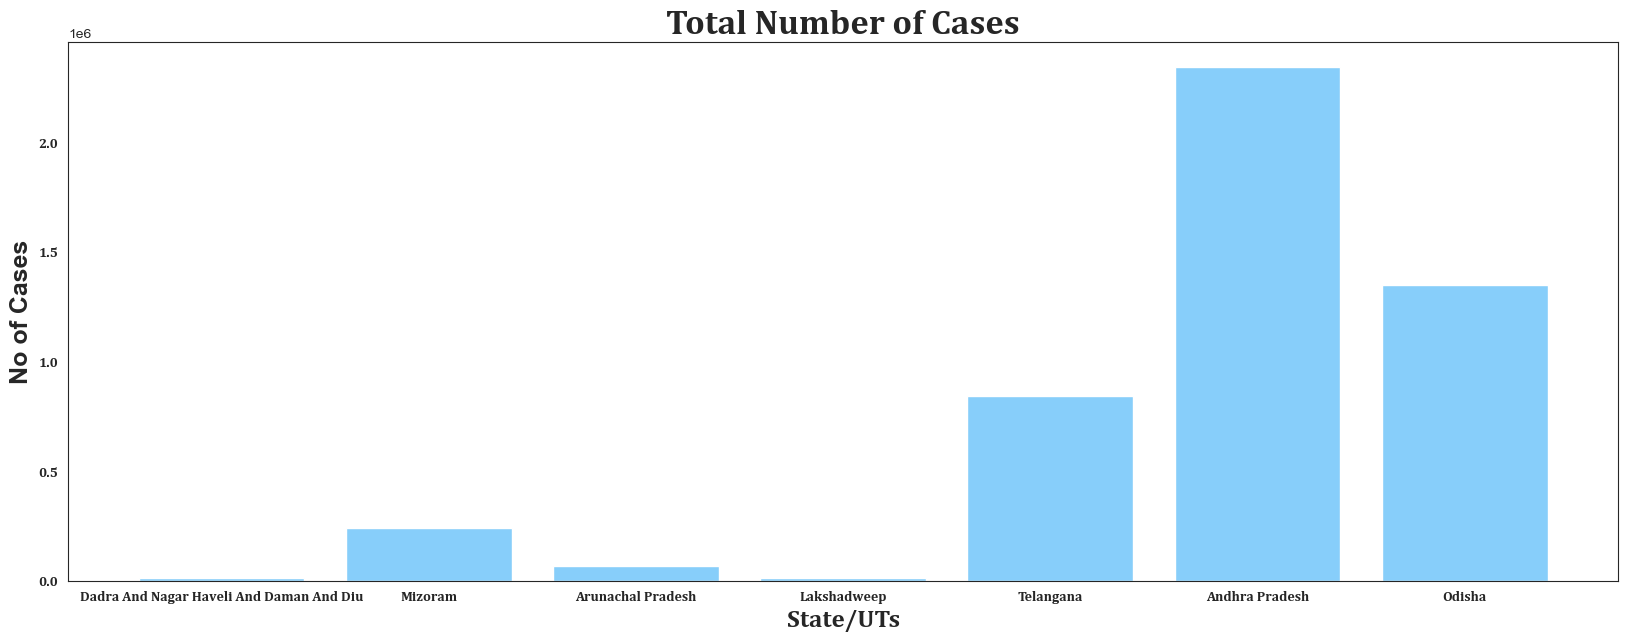

In [ ]:
### Figure ONE ###

#Define variable for lowest death ratio
x = df6['State/UTs'].head(7)
y = df6['Death Ratio'].head(7)

#Making chart for number of cases
fig = plt.figure(figsize=(20, 7))
plt.bar(x, y, color='powderblue')

plt.title('Top 7 States with Lowest Death Ratio', fontweight ='bold', font='cambria',fontsize = 25)
plt.xlabel('State/UTs', fontweight ='bold', font='cambria',fontsize = 18)
plt.ylabel('Death Ratio', fontweight ='bold', font='cambria',fontsize = 18)
plt.xticks(fontsize=16, font='cambria',fontweight='bold')
plt.yticks(fontsize=16, font='cambria',fontweight='bold')

plt.show()

### Figure TWO ###

#Define variable for vaccinated (%)
x = df6['State/UTs'].head(7)
b = df6['Percentage Vaccinated'].head(7)

#Making chart of number of vacinated (%)
fig = plt.figure(figsize=(20, 7))
plt.bar(x, b, color='deepskyblue')

plt.title('Vaccination as per % of Population', font='cambria',fontweight ='bold', fontsize = 25)
plt.xlabel('State/UTs', font='cambria',fontweight ='bold', fontsize = 18)
plt.ylabel('Percentage of Population', font='cambria',fontweight ='bold', fontsize = 18)
plt.xticks(fontsize=16, font='cambria',fontweight='bold')
plt.yticks(fontsize=16, font='cambria',fontweight='bold')

plt.show()

## Figure Three ##

#Define variable for total doses
x = df6['State/UTs'].head(7)
c = df6['Total Cases'].head(7)

#Making chart of number doses
fig = plt.figure(figsize=(20, 7))
plt.bar(x, c, color='lightskyblue')

plt.title('Total Number of Cases', font='cambria',fontweight ='bold', fontsize = 25)
plt.xlabel('State/UTs', font='cambria',fontweight ='bold', fontsize = 18)
plt.ylabel('No of Cases', fontweight ='bold', fontsize = 18)
plt.xticks(fontsize=16, font='cambria',fontweight='bold')
plt.yticks(fontsize=16, font='cambria',fontweight='bold')

plt.show()

## CORRELATION ANALYSIS

In [ ]:
combined_df.head()

,Total Vaccination Doses,Dose1,Dose 2,Percentage Vaccinated,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,State/UTs
0,991264,313284,320383,80.296290,10766,0,10637,129,0.0,98.80,1.20,Andaman And Nicobar
1,110957430,40645695,43555744,47.496802,2340676,0,2325943,14733,0.0,99.37,0.63,Andhra Pradesh
2,1924584,861396,748505,43.722440,67049,0,66753,296,0.0,99.56,0.44,Arunachal Pradesh
3,50335778,22550941,20575569,57.156340,746159,5,738119,8035,0.0,98.92,1.08,Assam
4,157293015,62956601,59160917,46.039494,855267,1,842952,12314,0.0,98.56,1.44,Bihar


,Total Vaccination Doses,Dose 2,Percentage Vaccinated,Death Ratio,Total Cases
Total Vaccination Doses,1.000000,0.998924,-0.006761,0.016403,0.500713
Dose 2,0.998924,1.000000,-0.002913,0.021066,0.524734
Percentage Vaccinated,-0.006761,-0.002913,1.000000,-0.261255,0.063107
Death Ratio,0.016403,0.021066,-0.261255,1.000000,0.118865
Total Cases,0.500713,0.524734,0.063107,0.118865,1.000000


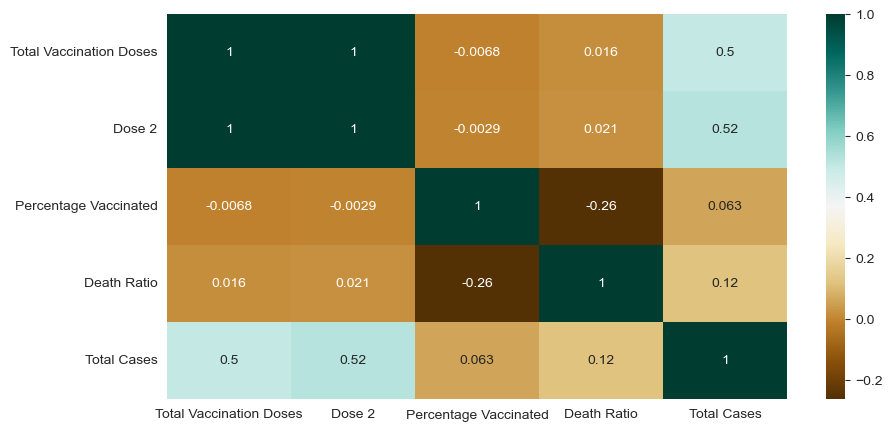

In [ ]:
#CONDUCTING CORRELATION

plt.figure(figsize=(10,5))
corr_df = combined_df[['Total Vaccination Doses','Dose 2',
                       'Percentage Vaccinated', 'Death Ratio', 'Total Cases']]
c=corr_df.corr()
c

#HEATMAP CREATION
sns.heatmap(c,cmap="BrBG",annot=True)
c

## Simple Regression

In [ ]:
combined_df.head()


,Total Vaccination Doses,Dose1,Dose 2,Percentage Vaccinated,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,State/UTs
0,991264,313284,320383,80.296290,10766,0,10637,129,0.0,98.80,1.20,Andaman And Nicobar
1,110957430,40645695,43555744,47.496802,2340676,0,2325943,14733,0.0,99.37,0.63,Andhra Pradesh
2,1924584,861396,748505,43.722440,67049,0,66753,296,0.0,99.56,0.44,Arunachal Pradesh
3,50335778,22550941,20575569,57.156340,746159,5,738119,8035,0.0,98.92,1.08,Assam
4,157293015,62956601,59160917,46.039494,855267,1,842952,12314,0.0,98.56,1.44,Bihar


## Regression 1¶

### Does taking second dose of the vaccine reduce the death ratio of COVID-19 patients?

In [29]:
# defining predictor and response variables
y = combined_df['Death Ratio']
x = combined_df['Dose 2']

# adding constant to the predictor variables
x = sm.add_constant(x)

#making a fit linaear regression model
model = sm.OLS(y, x).fit()

# viewing model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Death Ratio   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.029
Method:                 Least Squares   F-statistic:                   0.01509
Date:                Mon, 11 Mar 2024   Prob (F-statistic):              0.903
Time:                        17:30:13   Log-Likelihood:                -25.236
No. Observations:                  36   AIC:                             54.47
Df Residuals:                      34   BIC:                             57.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0896      0.107     10.201      0.0

### From the OLS regression table we can see that the impact of DOSE 2 on the death ratio is not significant as (p> 0.05). This suggests that the number of completely vaccinated individuals does not impact the death ratio of people affected bu the COVID-19 virus.  

## Regression 2

### Does the percentage of vaccinated population reduce the death ratio of COVID-19 patients?

In [30]:
# defining predictor and response variables
y = combined_df['Death Ratio']
x = combined_df['Percentage Vaccinated']

# adding constant to the predictor variables
x = sm.add_constant(x)

#making a fit linaear regression model
model = sm.OLS(y, x).fit()

# viewing model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Death Ratio   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     2.491
Date:                Mon, 11 Mar 2024   Prob (F-statistic):              0.124
Time:                        17:30:20   Log-Likelihood:                -23.972
No. Observations:                  36   AIC:                             51.94
Df Residuals:                      34   BIC:                             55.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.65

### From the OLS regression table we can see that the impact of Percentage Vaccinated on the death ratio is not significant as (p> 0.05). This suggests that the percentage of completely vaccinated population does not impact the death ratio of people affected by the COVID-19 virus.  

## ANOVA Test

## Does the state determine the death ratio?

### Null: The Death ratio does not differ as per State/UTs.
### Alternate: The Death ratio does differ as per State/UTs.

In [31]:
# defining predictor and response variables
y = combined_df['Death Ratio']
x = combined_df['State/UTs']

# creating a anova model
anova_covid = ols('y~x', data=combined_df).fit()

anova_table = sm.stats.anova_lm(anova_covid, type=2)

print(anova_table)

            df        sum_sq   mean_sq    F  PR(>F)
x         35.0  8.568622e+00  0.244818  0.0     NaN
Residual   0.0  1.533117e-29       inf  NaN     NaN


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/anova.py:142: RuntimeWarning: divide by zero encountered in scalar divide
  (model.ssr / model.df_resid))
